In [ ]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import subprocess
import os
import utm
import pandas as pd
import xarray as xr
import rasterio as rio
from scipy.interpolate import griddata
from rasterio.enums import Resampling
from pyproj import Transformer
from xrspatial import hillshade
import sys
sys.path.insert(0,"../dem")
sys.path.insert(0,"../../MrLavaLoba")
# import victor

In [ ]:
root_dir = '/'
os.chdir(root_dir)

### Inputs

In the following cell, we ask for a few basic inputs from you, and use standardized values for physical & rheological properties in each of our models. If you would like to further edit the models, refer further down to additional guidance unique to each simulation.

### inputs (original)

In [ ]:
easting = 329204

northing = 377842

dem = "/home/jovyan/shared/DEMs/Iceland_20mx20m_cropped.tif"

volume = 1e8

name = "fagradasfjall"

# For IMEX, we assign a reasonable yet arbitrary time for the flow to run (in seconds)
# Please change it at your leisure
run_time = 1000

In [ ]:
vent_easting = easting
vent_northing = northing

In [ ]:
coordinates = np.array([easting, northing])
raster = rxr.open_rasterio(dem, masked=True).squeeze()
f, ax = plt.subplots(figsize=(10, 5))
raster.plot(cmap="Greys",
                 ax=ax)
plt.scatter(easting, northing,c='red')

### inputs (from einat)

In [ ]:
vent_latitude = 63.890688
vent_longitude = -22.269106

dem = "/home/jovyan/shared/DEMs/Iceland_20mx20m_cropped.tif"

x = rio.open(dem)
bounds = x.bounds
crs = x.crs

transformer = Transformer.from_crs("EPSG:4326",crs)
converted = transformer.transform(vent_latitude,vent_longitude)
vent_easting = converted[0]
vent_northing = converted[1]

volume = 1e8

name = "fagradalsfjall"

# For IMEX, we assign a reasonable yet arbitrary time for the flow to run (in seconds)
# Please change it at your leisure
run_time = 1000

In [ ]:
easting = vent_easting
northing = vent_northing

In [ ]:
coordinates = np.array([vent_easting, vent_northing])
raster = rxr.open_rasterio(dem, masked=True).squeeze()
f, ax = plt.subplots(figsize=(10, 5))
raster.plot(cmap="Greys",
                 ax=ax)
plt.scatter(vent_easting, vent_northing,c='red')

### input (custom)

In [3]:
# vent_latitude, vent_longitude = 64.142040, -21.927106 # hallgrims
# vent_latitude, vent_longitude = 63.864277, -22.438681 # Þorbjörn peak
# vent_latitude, vent_longitude = 63.888551, -22.516075 # Eldorp
# vent_latitude, vent_longitude = 63.877759, -22.504275
# vent_latitude, vent_longitude = 63.868301, -22.505593
vent_latitude, vent_longitude = 63.882367, -22.512726

# dem = "/home/jovyan/shared/DEMs/Iceland_20mx20m_cropped.tif" # original
# dem = "/home/jovyan/Benchmark/IslandsDEMv1.0_2x2m_zmasl_isn93_57_20x20m.tif" # reykjavik 20x20
# dem = "/home/jovyan/Benchmark/IslandsDEMv1.0_2x2m_zmasl_isn93_67_cropped.tif" # Þorbjörn + Blue Lagoon
# dem = "/home/jovyan/Benchmark/Reykjanes_Square_Geo_Out.tif" # Geom
# dem = "/home/jovyan/Benchmark/heightmap_wall_rescaled.tif" # Rescaled
dem_dir = "../dem/"
dem_file = "heightmap_lavawalls_very_tall_out"
dem = dem_dir+dem_file+".tif" # Rescaled

x = rio.open(dem)
bounds = x.bounds
crs = x.crs

transformer = Transformer.from_crs("EPSG:4326",crs)
converted = transformer.transform(vent_latitude,vent_longitude)
vent_easting = converted[0]
vent_northing = converted[1]

volume = 1e8

name = "eldorp"

# For IMEX, we assign a reasonable yet arbitrary time for the flow to run (in seconds)
# Please change it at your leisure
run_time = 1000

In [4]:
easting = vent_easting
northing = vent_northing

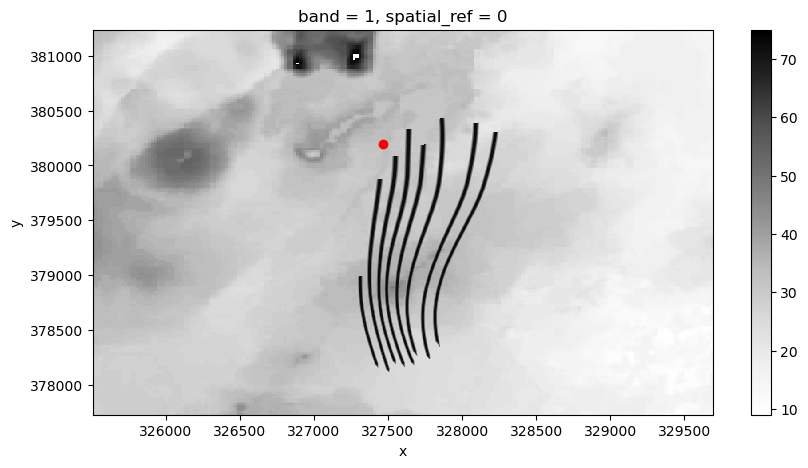

In [5]:
coordinates = np.array([vent_easting, vent_northing])
raster = rxr.open_rasterio(dem, masked=True).squeeze()
f, ax = plt.subplots(figsize=(10, 5))
raster.plot(cmap="Greys",
                 ax=ax)
plt.scatter(vent_easting, vent_northing,c='red')

In [6]:
raster = rxr.open_rasterio(dem)
raster = raster.sel({"band": 1})
xll, yll = int(raster.x.min()), int(raster.y.min())
coordinates = np.array([int(vent_easting),int(vent_northing)])
r = rio.open(dem)
res = r.res

output_num = str(int(run_time/100))
out = output_num.zfill(4)

filename, file_extension = os.path.splitext(dem)
file_name = os.path.basename(dem)
file_name = os.path.splitext(file_name)[0]
type_flag = 0 #0 is ascii, 1 is tiff
if file_extension in [".geotiff", ".tiff", ".tif"]:
    type_flag = 1
    asc_name = "".join((file_name, ".asc"))
    raster.rio.to_raster(asc_name)
    os.remove("".join((asc_name, ".aux.xml")))
    os.remove("".join((file_name, ".prj")))
    cell_size = open(f"""{asc_name}""","r+")
    info = cell_size.readlines()
    uniform = info[4].split()
    if uniform[0] == 'dx':
        info[4] = f"""cellsize     {int(float(uniform[1]))}\n"""
        info[5] = "NODATA_value  -9999\n"  # Set proper NODATA value
        cell_size.seek(0)
        cell_size.writelines(info)
        cell_size.truncate()
        cell_size.close()
elif file_extension in [".asc", ".ascii"]:
    type_flag = 0
    tiff_name = "".join((file_name, ".tiff"))
    raster.rio.to_raster(tiff_name)

### Molasses: Additional Notes

Molasses input parameters are stored in `custom_molasses.conf` in the `Molasses` folder. The most impactful change would be that of changing the minimum and maximum residual, as the cellular automata structure will cause a much larger or smaller area to be impacted. As a stochastic model, no physical parameters are used.

In [6]:
volume = 1e7

In [7]:
f = open("./Molasses/custom_molasses.conf","r+")
conf = f.readlines()
conf[4] = f"""MIN_TOTAL_VOLUME = {str(volume)}\n"""
conf[5] = f"""MAX_TOTAL_VOLUME = {str(volume)}\n"""
conf[6] = f"""MIN_PULSE_VOLUME = {float(volume)/10000}\n"""
conf[7] = f"""MAX_PULSE_VOLUME = {float(volume)/10000}\n"""
conf[10] = f"""DEM_FILE = {dem}\n"""
f.seek(0)
f.writelines(conf)
f.truncate()
f.close()

f=open("./Molasses/events.in","w")
f.write(f"""{easting},{northing}""")
f.close()

os.chdir("Molasses")
subprocess.run(f"""ln -s ../{dem} .""",shell=True)
subprocess.run("molasses custom_molasses.conf",shell=True)

victor.convert_molasses("molasses")
os.chdir("..")

ln: failed to create symbolic link './heightmap_lavawalls_very_tall_out.tif': File exists
Checking for missing parameters ....
ERROR 1: /srv/conda/envs/notebook/lib/gdalplugins/.././libtiff.so.6: undefined symbol: jpeg12_write_raw_data, version LIBJPEG_8.0
ERROR 1: /srv/conda/envs/notebook/lib/gdalplugins/.././libtiff.so.6: undefined symbol: jpeg12_write_raw_data, version LIBJPEG_8.0
ERROR 1: /srv/conda/envs/notebook/lib/gdalplugins/.././libtiff.so.6: undefined symbol: jpeg12_write_raw_data, version LIBJPEG_8.0
ERROR 1: /srv/conda/envs/notebook/lib/gdalplugins/.././libtiff.so.6: undefined symbol: jpeg12_write_raw_data, version LIBJPEG_8.0
ERROR 1: /srv/conda/envs/notebook/lib/gdalplugins/.././libtiff.so.6: undefined symbol: jpeg12_write_raw_data, version LIBJPEG_8.0
ERROR 1: /srv/conda/envs/notebook/lib/gdalplugins/.././libtiff.so.6: undefined symbol: jpeg12_write_raw_data, version LIBJPEG_8.0
ERROR 1: /srv/conda/envs/notebook/lib/gdalplugins/.././libtiff.so.6: undefined symbol: jpeg12

Seeding random number generator: 1739466002


               MOLASSES is a lava flow simulator.

Config file: custom_molasses.conf
Reading in Parameters...
             PARENTS = 1                    [assigned]
    ELEVATION_UNCERT = 0                    [assigned]
        MIN_RESIDUAL = 7                    [assigned]
        MAX_RESIDUAL = 7                    [assigned]
    MIN_TOTAL_VOLUME = 10000000.0           [assigned]
    MAX_TOTAL_VOLUME = 10000000.0           [assigned]
    MIN_PULSE_VOLUME = 1000.0               [assigned]
    MAX_PULSE_VOLUME = 1000.0               [assigned]
                RUNS = 1                    [assigned]
      ASCII_FLOW_MAP = 1                    [assigned]
            DEM_FILE = /home/jovyan/Benchmark/heightmap_lavawalls_very_tall_out.tif [assigned]
[assigned]VENTS_FILE = events.in            
Nothing missing.

DEM Information [GeoTIFF]:
  File:              /home/jovyan/Benchmark/heightmap_lavawalls_very_tall_out.tif
  Lower Left Origin: (32550

Allocating Memory for Active Cell List, Active list size: 1634716, uint max: 4294967295, int max: 2147483647


loaded.

[MAIN] Marking 0 AOI cells on DEM grid
[0-of-1] Events
Event locations: 327464.997903799,380199.23888988513
	E: 327464.997904 N: 380199.238890
Running molasses using 1 vents
Number of vents is 1
	E: 327464.997904 N: 380199.238890, 
Beginning flow simulation...
Flow residual: 7.00 (meters)
Total lava volume: 1e+07 (cubic meters)
Flow pulse volume: 1e+03 (cubic meters)
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 1399; Volume Remaining: 9900000.000 Pulse count: 100 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 2824; Volume Remaining: 9800000.000 Pulse count: 200 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 4247; Volume Remaining: 9700000.000 Pulse count: 300 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 5660; Volume Remaining: 9600000.000 Pulse count: 400 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 7051; Volume Remaining: 9500000.000 Pulse count: 500 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 8425; Volume Remaining: 9400000.000 Pulse count: 60

----------------------------------------

Writing output file: 

Not printing type = 1
Not printing type = 2
Not printing type = 3
Not printing type = 4
Not printing type = 5
Not printing type = 6


e count: 7400 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 100071; Volume Remaining: 2500000.000 Pulse count: 7500 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 101788; Volume Remaining: 2400000.000 Pulse count: 7600 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 103121; Volume Remaining: 2300000.000 Pulse count: 7700 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 104337; Volume Remaining: 2200000.000 Pulse count: 7800 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 105715; Volume Remaining: 2100000.000 Pulse count: 7900 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 107411; Volume Remaining: 2000000.000 Pulse count: 8000 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 108858; Volume Remaining: 1900000.000 Pulse count: 8100 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 109970; Volume Remaining: 1800000.000 Pulse count: 8200 
[Ev: 0][Run: 0]Vent: 327465 380199; Active Cells: 111668; Volume Remaining: 1700000.000 Pulse count: 8300 
[Ev: 0][Run: 0]Vent: 3

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


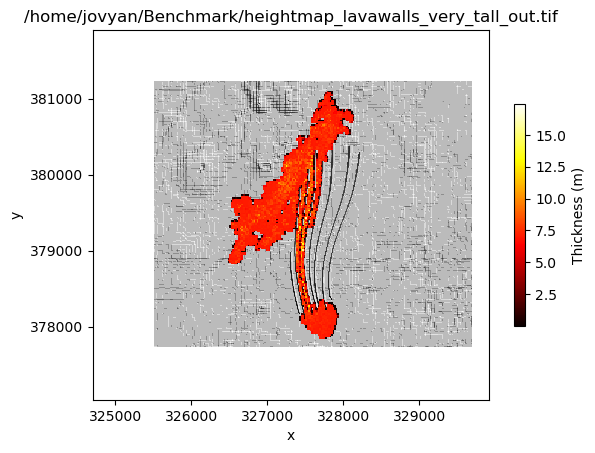

In [8]:
victor.plot_flow(dem,"./Molasses/molasses.asc")

### MrLavaLoba: Additional Notes

MrLavaLoba input parameters are stored in `input_data.py` in the `mr_lava_loba` folder. The most impactful changes would be those such as the thickening parameter, lobe exponent, or max slope probability. Other parameters not mentioned will also affect the creation and placement of lobes. As a stochastic model, no physical parameters are specified by the user.

In [8]:
g=open("../../MrLavaLoba/input_data.py","r+")
inp = g.readlines()
inp[1] = f"""run_name = '{name}'\n"""
if type_flag == 1:
    inp[3] = f"""source = '{asc_name}'\n"""
else:
    inp[3] = f"""source = '{dem}'\n"""
inp[42] = f"""vent_flag = 0\n"""
inp[45] = f"""x_vent = [{int(easting)}]\n"""
inp[46] = f"""y_vent = [{int(northing)}]\n"""
inp[92] = f"""total_volume = {volume}\n"""
inp[97] = f"""fixed_dimension_flag = 1\n"""
g.seek(0)
g.writelines(inp)
print(inp[3])
g.truncate()
g.close()

source = 'heightmap_lavawalls_very_tall_out.asc'



In [10]:
os.chdir("../../MrLavaLoba")
if type_flag == 1:
    subprocess.run(f"""ln -s ../{asc_name} .""",shell=True)
else:
    subprocess.run(f"""ln -s ../{dem} .""",shell=True)
subprocess.run("python mr_lava_loba.py",shell=True)
if type_flag == 1:
    os.remove(asc_name)
else:
    os.remove(dem)
os.chdir("..")


Mr Lava Loba by M.de' Michieli Vitturi and S.Tarquini

x_vent_end not used
y_vent_end not used
fissure_probabilities not used
Run name eldorp_000

Maximum number of lobes 1200
Average Lobe thickness = 0.132275 m

heightmap_lavawalls_very_tall_out.asc ['', '', '', '', '', '']


Traceback (most recent call last):
  File "/Users/jarm/Documents/work/code/lavaforming/MrLavaLoba/mr_lava_loba.py", line 367, in <module>
    values = [float(h.split(" ")[-1].strip()) for h in hdr]
  File "/Users/jarm/Documents/work/code/lavaforming/MrLavaLoba/mr_lava_loba.py", line 367, in <listcomp>
    values = [float(h.split(" ")[-1].strip()) for h in hdr]
ValueError: could not convert string to float: ''


In [12]:
sys.path.insert(0,"../../MrLavaLoba")

In [14]:
from MrLavaLoba.mr_lava_loba import main

ModuleNotFoundError: No module named 'input_data_advanced'

In [ ]:
victor.plot_flow(dem,f"""./mr_lava_loba/{name}_001_thickness_masked_0_96.asc""")

In [ ]:
os.chdir(root_dir)
type_flag = 1

g=open("./mr_lava_loba/input_data.py","r+")
inp = g.readlines()
inp[1] = f"""run_name = '{name}'\n"""

if type_flag == 1:
    inp[3] = f"""source = '{asc_name}'\n"""
else:
    inp[3] = f"""source = '{dem}'\n"""
inp[42] = f"""vent_flag = 0\n"""
inp[45] = f"""x_vent = [{int(vent_easting)}]\n"""
inp[46] = f"""y_vent = [{int(vent_northing)}]\n"""
inp[92] = f"""total_volume = {volume}\n"""
inp[97] = f"""fixed_dimension_flag = 1\n"""
g.seek(0)
g.writelines(inp)
g.truncate()
g.close()


os.chdir("mr_lava_loba")
if type_flag == 1:
    subprocess.run(f"""ln -s ../{asc_name} .""",shell=True)
else:
    subprocess.run(f"""ln -s ../{dem} .""",shell=True)
subprocess.run("python mr_lava_loba.py",shell=True)
#if type_flag == 1:
#    os.remove(asc_name)
#else:
#    os.remove(dem)
os.chdir(root_dir)

### IMEX_Lava: Additional Notes

IMEX_Lava input parameters are stored in `IMEX_LavaFlow.inp` in the `IMEX` folder. This is a physics-based, highly accurate, slower model. If desiring to change additional input parameters, we recommend editing the `TEMPERATURE_PARAMETERS`, `RHEOLOGY_PARAMETERS`, `GAS_TRANSPORT_PARAMETERS`, and `LIQUID_TRANSPPORT_PARAMETERS` namelists as needed. All other sections are carefully prepared based in your initial basic inputs, so ignore all other sections.

In [ ]:
array = rxr.open_rasterio(dem)
h=open("./IMEX/IMEX_LavaFlow.inp","r+")
inp = h.readlines()
inp[1] = f''' RUN_NAME="{name}"\n'''
inp[4] = f""" T_END=  {run_time},\n"""
inp[5] = f""" DT_OUTPUT=  100,\n"""
inp[13] = f""" X0= {int(xll)+1}     ,\n"""
inp[14] = f""" Y0= {int(yll)+1}     ,\n"""
inp[15] = f""" COMP_CELLS_X=  {len(array.x)-5},\n"""
inp[16] = f""" COMP_CELLS_Y=  {len(array.y)-5},\n"""
inp[17] = f""" CELL_SIZE = {res[0]}D0 ,\n"""
inp[103] = f"""  X_SOURCE=  {int(easting)}.0D0 ,\n"""
inp[104] = f"""  Y_SOURCE=  {int(northing)}.0D0 ,\n"""
inp[105] = f"""  R_SOURCE=  {res[0]}D0     ,\n"""
inp[106] = f""" VEL_SOURCE= {float(volume)/(res[0]**2*np.pi*run_time)} \n"""
h.seek(0)
h.writelines(inp)
h.truncate()
h.close()

os.chdir("IMEX")
if type_flag == 1:
    subprocess.run(f"""ln -s ../{asc_name} topography_dem.asc""",shell=True)
else:
    subprocess.run(f"""ln -s {dem} topography_dem.asc""",shell=True)
subprocess.run("./IMEX_LavaFlow",shell=True,stdout=subprocess.DEVNULL)
os.remove("topography_dem.asc")
os.chdir("..")

### LAVA2D: Additional Notes

LAVA2D input parameters are stored in `input.py` in the `lava2d` folder. This is a physics-based, highly accurate, slower model. If desiring to change additional input parameters, we recommend editing the `set_vent_props`, `set_lava_props`, `set_rheo`, `set_ambient`, and `set_numeric` sections as needed. All other sections are carefully prepared based in your initial basic inputs, so please leave them as is.

In [ ]:
os.chdir(root_dir)
transformer = Transformer.from_crs("EPSG:3057", "EPSG:4326")
rast = rio.open(dem)
left, bottom, right, top = rast.bounds
lower_left = transformer.transform(left, bottom)
top_right = transformer.transform(right, top)
src = transformer.transform(easting, northing)

l=open("./lava2d/input.py","r+")
inp = l.readlines()

if type_flag == 0:
    inp[4] = f"""    path_to_dem_file    = ('{tiff_name}'),\n"""
else:
    inp[4] = f"""    path_to_dem_file    = ('{dem}'),\n"""
inp[5] = f"""    Lon_SRC             = {src[1]}, # source longitude\n"""
inp[6] = f"""    Lat_SRC             = {src[0]},    # source latitude\n"""
inp[7] = f"""    Lon_LowerLeft       = {lower_left[1]}, # bounding box: lower-left longitude\n"""
inp[8] = f"""    Lat_LowerLeft       = {lower_left[0]}, # bounding box: lower-left latitude\n"""
inp[9] = f"""    Lon_UpperRight      = {top_right[1]}, # bounding box: upper-right longitude\n"""
inp[10] = f"""    Lat_UpperRight      = {top_right[0]},   # bounding box: upper-right latitude\n"""
inp[67] = f"""    max_iter = None, #one of them can be none, so the default value for both is none, if both none run till killed\n"""

inp[68] = f"""    max_time_hr = {run_time/3600},\n"""
l.seek(0)
l.writelines(inp)
l.truncate()
l.close()

subprocess.run("python lava2d/input.py",shell=True)

In [ ]:
data = xr.open_dataset("outputs/out.nc",group="DATA/PHYSICS",decode_coords="all")
data = data.where(data!=0, np.nan)

coord = xr.open_dataset("outputs/out.nc",group="DATA", decode_coords="all")
lat = coord.lat[:,0]
lon = coord.lon[0,:]
data['rows'] = lat.values
data['cols'] = lon.values

data = data.rename({"rows": "y", "cols": "x"})
repeated_arr_x = np.repeat(data.y.values[0], len(data.x))
repeated_arr_y = np.repeat(data.x.values[0], len(data.y))

utm1 = transformer2.transform(repeated_arr_x,data.x.values)
utm2 = transformer2.transform(data.y.values,repeated_arr_y)
# print(utm1[0], utm2[1])
data['x'] = utm1[0]
data['y'] = utm2[1]
data.lava_thickness_total.rio.to_raster("lava2d/lava2d.tif")

# Viz

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(ncols=2, nrows=2,subplot_kw=dict(projection=ccrs.epsg(32628)), figsize = (10,12))

ax0.cla()
east, north = easting, northing

thickness0,maxval0 = victor.plot_benchmark(dem, "./Molasses/molasses.asc", fig, ax0, coordinates, zoom=False)
ax0.set_title('MOLASSES', fontsize=16)

ax1.cla()
thickness1,maxval1 =victor.plot_benchmark(dem, f"""./mr_lava_loba/{name}_000_thickness_masked.asc""", fig, ax1, coordinates, zoom=False,model="mrlavaloba")
ax1.set_title('MR LAVA LOBA', fontsize=16)
ax1.set_aspect("equal")

ax2.cla()
thickness2,maxval2 = victor.plot_benchmark(dem, f"""./IMEX/{name}_{out}.asc""", fig, ax2, coordinates, zoom=False)
ax2.set_title('IMEX', fontsize=16)
ax2.set_aspect("equal")

ax3.cla()
raster = rxr.open_rasterio(dem, masked=True).squeeze()
ds = xr.open_dataset("lava2d/outputs/out.nc",group="DATA/PHYSICS")
ds = ds.where(ds != 0)
lava = ds['lava_thickness_total']
da = xr.open_dataset("lava2d/outputs/out.nc",group="DATA")
es = da.x.values[0] + easting
ns = da.y.values[:,0] + northing
lava = lava.assign_coords(rows=ns)
lava = lava.assign_coords(cols=es)
ax3.set_xticks(np.linspace(east-4000, east+4000,5))
ax3.set_yticks(np.linspace(north-4000, north+4000,5))
ax3.set_xlim([east-4000, east+4000])
ax3.set_ylim([north-4000, north+4000])
raster_agg = hillshade(raster)
render = raster_agg.plot.imshow(ax=ax3,cmap="Greys")
render.colorbar.remove()
lava.plot.imshow(ax=ax3,cmap="Wistia")
ax3.set_title('lava2D', fontsize=16)

cbar_ax = fig.add_axes([.25, 0, 0.5, 0.05])
fig.colorbar(thickness0, cax=cbar_ax, label="Flow Thickness (m)", orientation="horizontal")